<img src=https://www.foodstyles.com/media/1017/foodstyles_logo.svg height="200">

## <p style="background-color:#FEB202; font-family:ubuntu; color:#303030; font-size:175%; text-align:center; border-radius:10px 10px;">Data Analytics</p>

## <p style="background-color:#FEB202; font-family:ubuntu; color:#303030; font-size:175%; text-align:center;  border-radius:10px 10px;"> Restaurants EDA</p>

<a id="zero"></a>

## <p style="background-color:#FEB202; font-family:ubuntu; color:#303030; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [DATA CLEANING](#one)
* [DATA UNDERSTANDING](#two)
* [BUSINESS-SPECIFIC](#three)
* [BONUS](#four)    

## <p style="background-color:#FEB202; font-family:ubuntu; color:#303030; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>


The project consists of **4 parts:**
* **``First part``** is related to **``'data cleaning'``**. 
* **``Second part``** is related to **``'data understanding'``**. 
* **``Third part``** is related to **``'business-specific'``** 
* **``Fourth part``** is related to **``'bonus'``** 

<a id="one"></a>
## <p style="background-color:#FEB202; font-family:ubuntu; color:#303030; font-size:175%; text-align:center;  border-radius:10px 10px;">DATA CLEANING</p>


Once you've installed NumPy & Pandas you can import them as a library:

In [9]:
#!pip install geopy
#!pip install deepchecks
#!pip install typing-extensions --upgrade
#!pip install termcolor
#!pip install colorama


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

In [4]:
df = pd.read_csv("/content/drive/MyDrive/datascience/dataset.csv")

In [5]:
df.head(3).T

,0,1,2
restaurant_link,g10001637-d10002227,g10001637-d14975787,g10002858-d4586832
restaurant_name,Le 147,Le Saint Jouvent,Au Bout du Pont
original_location,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...","[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...","[""Europe"", ""France"", ""Centre-Val de Loire"", ""B..."
country,France,France,France
region,Nouvelle-Aquitaine,Nouvelle-Aquitaine,Centre-Val de Loire
province,Haute-Vienne,Haute-Vienne,Berry
city,Saint-Jouvent,Saint-Jouvent,Rivarennes
address,"10 Maison Neuve, 87510 Saint-Jouvent France","16 Place de l Eglise, 87510 Saint-Jouvent France","2 rue des Dames, 36800 Rivarennes France"
latitude,45.96,45.96,46.64
longitude,1.17,1.21,1.39


In [11]:

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    
    print(colored("Columns after rename:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
## To view summary information about the columns

def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
                    
def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .8 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"multicolinearity alert in between {col} - {i}", "red", attrs=["bold"])
    else:
        cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])                     
                    
###############################################################################

def duplicate_values(df):
    print(colored("Duplicate check...", 'yellow', attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')     

###############################################################################
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('Missing value control...', 'yellow', attrs=['bold']),'\n',
              colored('If there is a missing value above the limit you have given, the relevant columns are dropped and an information is given.'), sep='')

###############################################################################

def drop_null(df, limit):
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'number of', i ,'were null and dropped')
            df.drop(i, axis=1, inplace=True)
    print(colored('Last shape after missing value control:', 'yellow', attrs=['bold']), df.shape, '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')

###############################################################################

def shape_control():
    print('df.shape:', df.shape)

###############################################################################  

## show values in bar graphic
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
###############################################################################   

In [12]:
first_looking(df)
duplicate_values(df)
drop_columns(df, [])
drop_null(df, 90)

Shape:(1083397, 42)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                   

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,1067607.00,46.57,5.88,27.64,41.91,46.59,51.41,69.94
longitude,1067607.00,5.84,8.64,-71.22,-0.80,5.65,12.24,33.37
open_days_per_week,593832.00,6.33,0.97,1.00,6.00,7.00,7.00,7.00
open_hours_per_week,593832.00,62.02,30.54,0.00,39.00,58.50,81.50,168.00
working_shifts_per_week,593832.00,7.63,2.55,1.00,6.00,7.00,7.00,15.00
avg_rating,986761.00,4.04,0.71,1.00,3.50,4.00,4.50,5.00
total_reviews_count,1031162.00,102.89,267.24,0.00,6.00,24.00,93.00,52404.00
reviews_count_in_default_language,988204.00,44.56,148.73,1.00,2.00,7.00,26.00,15229.00
excellent,988204.00,24.65,89.85,0.00,1.00,3.00,13.00,9383.00
very_good,988204.00,10.49,35.51,0.00,0.00,2.00,6.00,4091.00


## <p style="background-color:#12CFE7; font-family:ubuntu; color:#303030; font-size:100%; text-align:center; border-radius:10px 10px;">1. Identify the columns with mixed data types</p>

<a href="#one" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#fff; background-color:#E54141;border-radius:10px 10px;padding:10px" data-toggle="popover">&#8593; Data Cleaning</a>

### Mixed data types is when a column contains both string values and numeric values

In [14]:
#Detect mixed-type column
data= df.apply(lambda x: 'mixed' in pd.api.types.infer_dtype(x))

 

In [15]:
for column in df.columns:
    c_type = pd.api.types.infer_dtype(df[column])
    if((c_type=="mixed")&(c_type=="mixed-integer")):
        print(c_type,column)

In [16]:
data

restaurant_link                      False
restaurant_name                      False
original_location                    False
country                              False
region                               False
province                             False
city                                 False
address                              False
latitude                             False
longitude                            False
claimed                              False
awards                               False
popularity_detailed                  False
popularity_generic                   False
top_tags                             False
price_level                          False
price_range                          False
meals                                False
cuisines                             False
special_diets                        False
features                             False
vegetarian_friendly                  False
vegan_options                        False
gluten_free

In [17]:
data = pd.DataFrame({'column_name':data.index, 'is_mixed':data.values})

In [18]:
data[data.is_mixed==True]

,column_name,is_mixed


## As a result of the analysis, mixed_data was not found.

<a id="two"></a>
## <p style="background-color:#FEB202; font-family:ubuntu; color:#303030; font-size:175%; text-align:center; border-radius:10px 10px;">Data Understanding</p>

## <p style="background-color:#12CFE7; font-family:ubuntu; color:#303030; font-size:100%; text-align:center; border-radius:10px 10px;">1. Are the review columns correlated with the rating columns?</p>

<a href="#two" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#fff; background-color:#E54141;border-radius:10px 10px;padding:10px" data-toggle="popover">&#8593; Data Understanding</a>

H0- At least 1 Review columns are correlated

H1- At least 1 Review columns are not correlated

In [19]:
df_review = df[['excellent', 'very_good',
       'average', 'poor', 'terrible','total_reviews_count', 'food', 'service', 'value', 'atmosphere', 'avg_rating']]

In [20]:
df_review.isnull().sum()

excellent               95193
very_good               95193
average                 95193
poor                    95193
terrible                95193
total_reviews_count     52235
food                   484072
service                479110
value                  480705
atmosphere             821612
avg_rating              96636
dtype: int64

In [21]:
df_review.describe()

,excellent,very_good,average,poor,terrible,total_reviews_count,food,service,value,atmosphere,avg_rating
count,988204.00,988204.00,988204.00,988204.00,988204.00,1031162.00,599325.00,604287.00,602692.00,261785.00,986761.00
mean,24.65,10.49,4.11,2.36,2.95,102.89,4.10,4.07,3.98,3.93,4.04
std,89.85,35.51,15.67,9.35,11.03,267.24,0.56,0.58,0.58,0.56,0.71
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,0.00,0.00,0.00,0.00,6.00,4.00,4.00,3.50,3.50,3.50
50%,3.00,2.00,1.00,0.00,0.00,24.00,4.00,4.00,4.00,4.00,4.00
75%,13.00,6.00,2.00,1.00,2.00,93.00,4.50,4.50,4.50,4.50,4.50
max,9383.00,4091.00,2132.00,1253.00,1215.00,52404.00,5.00,5.00,5.00,5.00,5.00


In [22]:
df_review.corr()

,excellent,very_good,average,poor,terrible,total_reviews_count,food,service,value,atmosphere,avg_rating
excellent,1.00,0.84,0.73,0.63,0.50,0.72,0.13,0.13,0.10,0.17,0.09
very_good,0.84,1.00,0.93,0.83,0.67,0.71,0.02,0.02,-0.01,0.07,0.01
average,0.73,0.93,1.00,0.93,0.79,0.63,-0.06,-0.05,-0.08,-0.01,-0.04
poor,0.63,0.83,0.93,1.00,0.88,0.54,-0.10,-0.09,-0.13,-0.06,-0.08
terrible,0.50,0.67,0.79,0.88,1.00,0.45,-0.19,-0.18,-0.20,-0.14,-0.16
total_reviews_count,0.72,0.71,0.63,0.54,0.45,1.00,0.06,0.04,-0.01,0.09,0.04
food,0.13,0.02,-0.06,-0.10,-0.19,0.06,1.00,0.82,0.82,0.63,0.82
service,0.13,0.02,-0.05,-0.09,-0.18,0.04,0.82,1.00,0.80,0.66,0.81
value,0.10,-0.01,-0.08,-0.13,-0.20,-0.01,0.82,0.80,1.00,0.56,0.77
atmosphere,0.17,0.07,-0.01,-0.06,-0.14,0.09,0.63,0.66,0.56,1.00,0.63


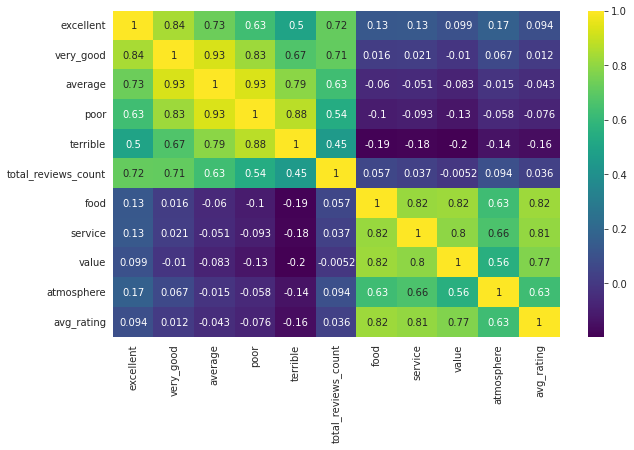

In [220]:
sns.heatmap(data=df_review.corr(), annot=True, cmap='viridis')

In [24]:
df_review[df_review.excellent>100][['excellent','food']]

,excellent,food
75,202.00,4.50
82,155.00,4.50
165,215.00,4.00
167,200.00,3.50
168,114.00,4.50
...,...,...
1083180,160.00,5.00
1083268,153.00,4.50
1083296,105.00,4.50
1083313,135.00,4.00


## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">In order to look at the correlation between review columns, both types of column data must be similar. While the values of the columns in the review1 ["excellent", "very_good", "average", "poor", "terrible", "total_reviews_count", "reviews_count_in_default_language"] type show the number of customers' votes, the values of the columns in the review2 ["food", "service", "value", "atmosphere", "avg_rating"] type consist of scores. As we can see that there is no correlation between review and rating columns.As a result of the analysis, the H0 hypothesis is rejected. Therefore, the H1 hypothesis is accepted.</p>



## <p style="background-color:#12CFE7; font-family:ubuntu; color:#303030; font-size:100%; text-align:center; border-radius:10px 10px;">2.Are vegetarian-friendly restaurants better than non-vegetarian ones?</p>

<a href="#two" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#fff; background-color:#E54141;border-radius:10px 10px;padding:10px" data-toggle="popover">&#8593; Data Understanding</a>

H0- Vegetarian-friendly restaurants' average score's are not better than non-vegetarian ones

H1- Vegetarian-friendly restaurants' average score's are better than non-vegetarian ones

In [25]:
df.vegetarian_friendly.unique()

array(['N', 'Y'], dtype=object)

In [26]:
df_vegeterian_friendly = df[['vegetarian_friendly','avg_rating']]

In [27]:
df_vegeterian_friendly.shape

(1083397, 2)

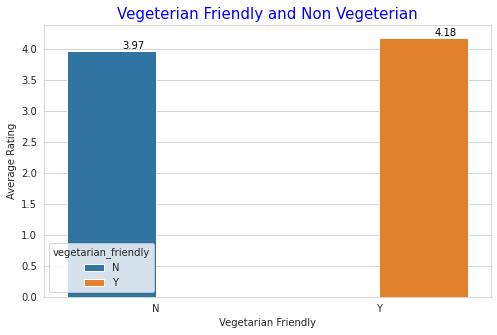

In [59]:
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(data=df_vegeterian_friendly, x='vegetarian_friendly', y='avg_rating', hue='vegetarian_friendly', ax=ax)
ax.set(title='Vegetarian friendly and non vegeterian',
        xlabel='Vegetarian Friendly', ylabel='Average Rating')
ax.set_title('Vegeterian Friendly and Non Vegeterian',color = 'blue',fontsize=15);
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()),
                   (p.get_x() + 0.3, p.get_height()),
                   ha='center',
                   va='bottom',
                   color='black')


## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">When we look at the graph, it is seen that the average rating score of vegetarian restaurants is 4.18, while the average rating score of non-vegetarian restaurants is 3.97. It can be said that vegetarian cuisines are better than non-vegetarian cuisines by a very small margin.As a result of the analysis, the average_rating_score of vegeterian restaurants greater than average_rating_score of non vegeterian restaurant.So, H0 hypothesis was rejected. Therefore, the H1 hypothesis was accepted.</p>


## <p style="background-color:#12CFE7; font-family:ubuntu; color:#303030; font-size:100%; text-align:center; border-radius:10px 10px;">3.Are there any significantly more expensive cuisines?</p>

<a href="#two" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#fff; background-color:#E54141;border-radius:10px 10px;padding:10px" data-toggle="popover">&#8593; Data Understanding</a>

H0- There isn't any cuisines that are twice as expensive as others?

H1- There is any cuisines that are twice as expensive as others?

In [37]:
df['price_level'].unique()

array(['€', '€€-€€€', nan, '€€€€'], dtype=object)

In [33]:
# converting the price values '€', '€€-€€€', and '€€€€' into three categories (low, medium, high)
df['price_level_cat'] = ['low' if x == '€' else 'medium' if x == '€€-€€€' else 'high' if x == '€€€€' else np.nan for x in df['price_level']]


In [34]:
# get only first type of cuisine in the records.
df['cuisine1'] = [x.split(',', 1)[0] if ',' in x else np.nan if x == 'nan' else x for x in df['cuisines'].astype('str')]

In [35]:
dfcou=df[['price_level_cat','cuisine1']]

In [38]:
df_cuisines = df[df.price_level_cat=="high"][['price_level_cat','cuisine1']]

In [40]:
df_cuisine= dfcou[dfcou.price_level_cat=="high"].value_counts()[:10].sort_values(ascending=False)

In [49]:
df_cuisine=pd.DataFrame({'name':df_cuisine.index.get_level_values('cuisine1'), 'number_of_restaurant':df_cuisine.values})


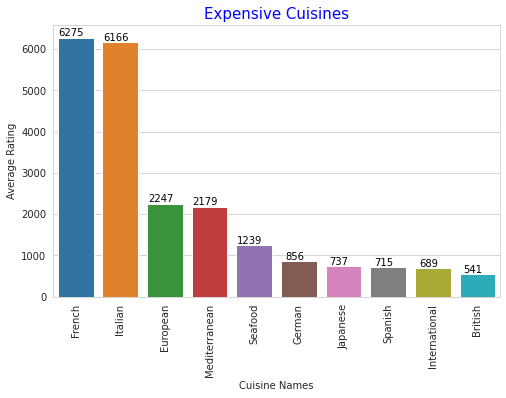

In [56]:
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(data=df_cuisine, x='name', y='number_of_restaurant', ax=ax)
ax.set(title='Expensive Cuisines',
        xlabel='Cuisine Names', ylabel='Average Rating')
ax.set_title('Expensive Cuisines',color = 'blue',fontsize=15);
ax.tick_params(axis='x', rotation=90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                   (p.get_x() + 0.3, p.get_height()),
                   ha='center',
                   va='bottom',
                   color='black')


## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">When we look at the graph, it is seen that Italian and French cuisine is about 3 times more expensive than other cuisines.As a result of the analysis, the H0 hypothesis was rejected. Therefore, hypothesis H1 was accepted.</p>


<a id="three"></a>
## <p style="background-color:#FEB202; font-family:ubuntu; color:#303030; font-size:175%; text-align:center; border-radius:10px 10px;">Business-Specific</p>

H0- It is not possible to find 5 capital cities where gluten-free restaurants can be opened.

H1- It is possible to find 5 capital cities where gluten-free restaurants can be opened.

In [60]:
df1=pd.read_csv('/content/drive/MyDrive/datascience/europe_capitals_population_and_area.csv',sep=";")

In [61]:
df1.head()

,CityNo,City,Country,Population,Area in km2
0,1,Amsterdam,Netherland,851573,"219,32"
1,2,Athens,Greece,664046,2929
2,4,Barcelona,Spain,1620809,"101,4"
3,4,Berlin,Germany,3711930,"891,7"
4,5,Bratislava,Slovakia,424428,"367,6"


In [64]:
first_looking(df1)
duplicate_values(df1)
drop_columns(df1, [])
drop_null(df1, 90)

Shape:(31, 5)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CityNo        31 non-null     int64 
 1   City          31 non-null     object
 2   Country       31 non-null     object
 3   Population    31 non-null     int64 
 4   Area in km2   31 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.3+ KB
None
****************************************************************************************************
Number of Uniques:
CityNo          30
City            31
Country         23
Population      31
Area in km2     31
dtype: int64
****************************************************************************************************
Missing Values:
Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []
*************

In [65]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cityno,31.00,16.03,9.05,1.00,8.50,16.00,23.50,31.00
population,31.00,1425453.68,1635564.27,198979.00,517113.50,851573.00,1771988.00,8825000.00


In [66]:
df1.columns=['city_no','city','country','population','area']

In [67]:
df.city.isnull().sum()

400685


## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">Since there are too many Nan values in the city column, we will use the original_location column to fill in the missing data.</p>


In [68]:
df[['original_location','city']].head()

,original_location,city
0,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",Saint-Jouvent
1,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",Saint-Jouvent
2,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",Rivarennes
3,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",Lacelle
4,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",Saint-Laurent-de-Levezou


In [69]:
df.original_location = df.original_location.apply(lambda x: x.strip('[]').split(','))

In [70]:
def return_last_item(row):
    if isinstance(row, (list, tuple)):
        return row[-1].strip().replace('"','')
    else:
        return row

In [71]:
df['city1'] = df.original_location.apply(return_last_item)

In [72]:
df[['city1','city']]

,city1,city
0,Saint-Jouvent,Saint-Jouvent
1,Saint-Jouvent,Saint-Jouvent
2,Rivarennes,Rivarennes
3,Lacelle,Lacelle
4,Saint-Laurent-de-Levezou,Saint-Laurent-de-Levezou
...,...,...
1083392,Valea Lupului,NaN
1083393,Apata,Apata
1083394,Sacel,Sacel
1083395,Maracineni,NaN


In [73]:
df_gluten_free = df[df.gluten_free=="Y"]

In [74]:
df_gluten_free= df_gluten_free.groupby('city1')['city1'].count().to_frame(name = 'number_of_restaurant').reset_index()

In [75]:
df_gluten_free.columns = ['city', 'number_of_restaurant']

In [76]:
df3=pd.merge(df1,df_gluten_free, how='left')

In [77]:
df3.head()

,city_no,city,country,population,area,number_of_restaurant
0,1,Amsterdam,Netherland,851573,"219,32",622.00
1,2,Athens,Greece,664046,2929,271.00
2,4,Barcelona,Spain,1620809,"101,4",1335.00
3,4,Berlin,Germany,3711930,"891,7",539.00
4,5,Bratislava,Slovakia,424428,"367,6",67.00


In [78]:
df3.isnull().sum()

city_no                 0
city                    0
country                 0
population              0
area                    0
number_of_restaurant    6
dtype: int64

In [79]:
df3[df3.isna().any(axis=1)]

,city_no,city,country,population,area,number_of_restaurant
10,11,Geneva,Switzerland,198979,"15,92",NaN
15,16,Ljubljana,Slovenia,279631,"163,8",NaN
17,18,Luxembourg,Luxembourg,590667,"2586,4",NaN
22,23,Oporto,Portugal,214349,"41,42",NaN
23,24,Oslo,Norway,634293,454,NaN
30,31,Zurich,Switzerland,409241,"87,93",NaN



## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">Since there are no gluten-free restaurants in these cities, we fill the Nan values with 0.</p>


In [80]:
print(len(df[(df.gluten_free=="Y")&(df.city1=="Geneva")]))
print(len(df[(df.gluten_free=="Y")&(df.city1=="Ljubljana")]))
print(len(df[(df.gluten_free=="Y")&(df.city1=="Luxembourg")]))
print(len(df[(df.gluten_free=="Y")&(df.city1=="Oporto")]))
print(len(df[(df.gluten_free=="Y")&(df.city1=="Oslo")]))
print(len(df[(df.gluten_free=="Y")&(df.city1=="Zurich")]))

0
0
0
0
0
0


In [81]:
df3['number_of_restaurant'] = df3['number_of_restaurant'].fillna(0)

In [82]:
df3.isnull().sum()

city_no                 0
city                    0
country                 0
population              0
area                    0
number_of_restaurant    0
dtype: int64

In [83]:
from __future__ import division
df3['people_per_rest'] = (df3.population/df3.number_of_restaurant).replace(np.inf, 0)

In [84]:
df3_top_10 = df3.sort_values(['number_of_restaurant','people_per_rest'],axis = 0)[:10]

In [85]:
df3_top_10.head(10)

,city_no,city,country,population,area,number_of_restaurant,people_per_rest
10,11,Geneva,Switzerland,198979,"15,92",0.00,0.00
15,16,Ljubljana,Slovenia,279631,"163,8",0.00,0.00
17,18,Luxembourg,Luxembourg,590667,"2586,4",0.00,0.00
22,23,Oporto,Portugal,214349,"41,42",0.00,0.00
23,24,Oslo,Norway,634293,454,0.00,0.00
30,31,Zurich,Switzerland,409241,"87,93",0.00,0.00
18,19,Lyon,France,506615,"47,87",54.00,9381.76
4,5,Bratislava,Slovakia,424428,"367,6",67.00,6334.75
5,6,Brussels,Belgium,1191604,"161,38",126.00,9457.17
11,12,Hamburg,Germany,1822445,755,149.00,12231.17


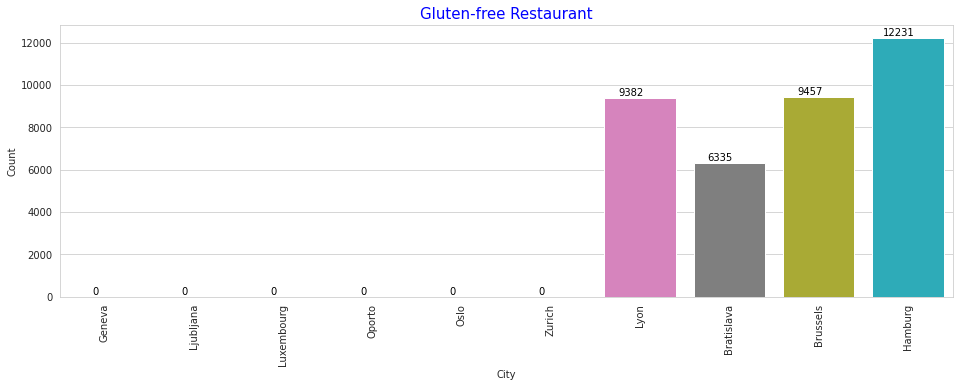

In [88]:
fig, ax =plt.subplots(figsize=(16,5))
ax = sns.barplot(x=df3_top_10.city, y=df3_top_10.people_per_rest,ax=ax)
ax.set(title='Which European city should open a gluten-free restaurant?',
        xlabel='City', ylabel='Count')
ax.set_title('Gluten-free Restaurant',color = 'blue',fontsize=15);
ax.tick_params(axis='x', rotation=90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                   (p.get_x() + 0.3, p.get_height()),
                   ha='center',
                   va='bottom',
                   color='black')


## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">When the analysis is made according to the cities in the given dataset, it is seen that there are no gluten-free restaurants in the cities of Geneva, Ljubljana, Luxembourg, Oporto, Oslo and Zurich. Therefore, new gluten-free restaurants can be opened in these cities.</p>



## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">However, it is stated in the directive that the gluten-free restaurant will be opened in a European capital. To avoid misunderstanding, the European capitals were put in a series first. Then the transactions were made, this time as the European capital.</p>


In [89]:
capital_cities = ["Amsterdam","Athens","Berlin","Bratislava","Brussels","Budapes","Copenhagen","Dublin","Helsinki","Lisbon","Ljubljana","London","Luxembourg","Madrid","Nicosia","Paris","Prague","Riga","Rome","Stockholm","Tallin","Valetta","Vienn","Vilnius","Warsaw"]

In [90]:
df4 = df3[df3['city'].isin(capital_cities)]

In [91]:
df4_top_10 = df4.sort_values(['number_of_restaurant','people_per_rest'],axis = 0)[:10]

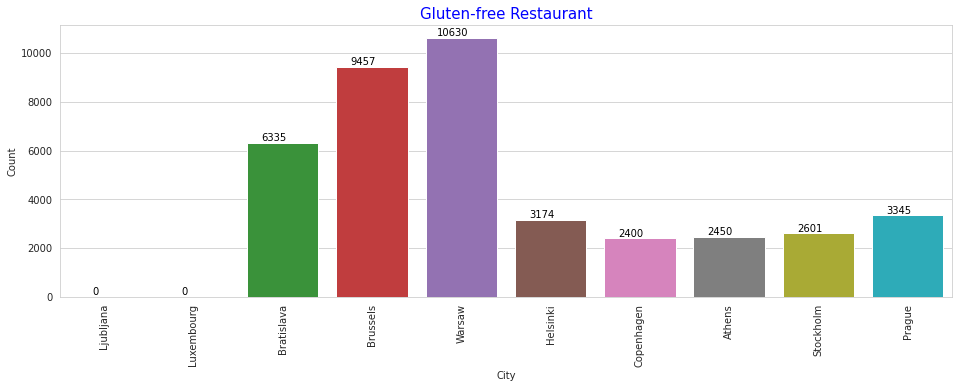

In [93]:
fig, ax =plt.subplots(figsize=(16,5))
ax = sns.barplot(x=df4_top_10.city, y=df4_top_10.people_per_rest,ax=ax)
ax.set(title='Which European Capital City should open a gluten-free restaurant?',
        xlabel='City', ylabel='Count')
ax.set_title('Gluten-free Restaurant',color = 'blue',fontsize=15);
ax.tick_params(axis='x', rotation=90)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                   (p.get_x() + 0.3, p.get_height()),
                   ha='center',
                   va='bottom',
                   color='black')


## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">When the analysis is made according to the europian capital cities in the given dataset, it is seen that there are no gluten-free restaurants in the cities of Ljubljana, Luxembourg, Brastislava, Brussels and Warsaw. Therefore, new gluten-free restaurants can be opened in these capital cities.As a result of the analysis, the H0 hypothesis was rejected. Therefore, the H1 hypothesis was accepted.</p>



## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">Think and propose a couple of other ways this dataset could be used to help businesses.</p>



## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">1.The menus of restaurants can be added to this dataset, as in the project you are currently doing. Thus, the best restaurants based on food can be determined.</p>



## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">2.Menu Optimization: Restaurants can update their menus based on customer comments. In this way, they can gain more customer loyalty. Best-selling food does not necessarily mean the most profitable. Customer reviews are very important at this point. In addition, pushing force can be applied by making special promotions for some menus.</p>



## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">3.It can provide light to different business areas by looking at the price_level column in the restaurant dataset. For example, if you are going to open a boutique that will sell expensive clothes, it would be a wiser investment to choose the region with high price_level of the restaurants around you.</p>


<a id="four"></a>
## <p style="background-color:#FEB202; font-family:ubuntu; color:#303030; font-size:175%; text-align:center; border-radius:10px 10px;">BONUS</p>

## PARIS

H0- It is not possible to find at least 1 optimal place where italian restaurant can be opened in the Paris.

H1- It is possible to find at least 1 optimal place where italian restaurant can be opened in the Paris.

In [151]:
import plotly.express as px
import geopy.distance
pd.options.display.float_format = '{:,.7f}'.format
df5 = pd.read_json("/content/drive/MyDrive/datascience/paris_bounding_polygon.json")

In [152]:
df5.head()

,0,1
0,2.2241686,48.8534419
1,2.2241606,48.8534778
2,2.2241429,48.8535779
3,2.2241349,48.8536539
4,2.2241290,48.8537590


In [153]:
df5.columns=['longitude','latitude']

In [154]:
df5.sort_values(by='latitude')

,longitude,latitude
728,2.3444967,48.8155755
729,2.3439740,48.8157661
724,2.3469205,48.8158654
730,2.3436497,48.8158679
725,2.3466224,48.8158942
...,...,...
193,2.3759783,48.9019808
194,2.3790003,48.9020474
197,2.3849847,48.9020514
195,2.3800760,48.9020689


In [155]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  919 non-null    float64
 1   latitude   919 non-null    float64
dtypes: float64(2)
memory usage: 14.5 KB


In [185]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

polygon = Polygon([tuple(x) for x in df5[['latitude', 'longitude']].to_numpy()])
df['within'] = df.apply(lambda x: polygon.contains(Point(x['latitude'], x['longitude'])), axis=1)

In [186]:
df['within'].unique()

array([False,  True])

In [209]:
from numpy import radians, cos, sin, sqrt 
from numpy import arcsin as asin
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [210]:
df_paris = df[(df.within==True)&(df.cuisines=="Italian")]

In [211]:
df_paris['lat']=  48.858093
df_paris['lon']= 2.294694
                

In [212]:
df_paris['distance'] = df_paris.apply(lambda x:haversine(x['lat'], x['lon'], x['latitude'], x['longitude']) * 0.90, axis = 1)
df.reset_index(inplace = True,drop = True)


In [213]:
df_paris["min_dist_to_neighbor"]=0.00
df_paris["new_lat"]=0.000000
df_paris["new_lon"]=0.000000
df_paris["candidate"]=False

In [214]:
for i in range(1, df_paris.shape[0]):
  
  min_dist=df_paris.distance.iloc[i]
  for j in range(i+1, df_paris.shape[0]):
      dist = haversine(df_paris.latitude.iloc[i], df_paris.longitude.iloc[i],df_paris.latitude.iloc[j], df_paris.longitude.iloc[j]) * 0.90
      if(dist<min_dist):
          min_dist = dist
          lat=df_paris.latitude.iloc[j]
          lon=df_paris.longitude.iloc[j]
  df_paris["min_dist_to_neighbor"].iloc[i]=min_dist
  df_paris["new_lat"].iloc[i]=(df_paris.latitude.iloc[i]+lat)/2
  df_paris["new_lon"].iloc[i]=(df_paris.longitude.iloc[i]+lon)/2
    
    



In [215]:
#The distance to the nearest restaurant will be at least 1km. The location will be the middle of these two restaurants.
df_candidate = df_paris[df_paris.min_dist_to_neighbor>1][["min_dist_to_neighbor","new_lon","new_lat"]]
df_candidate['candidate']=True


,min_dist_to_neighbor,new_lon,new_lat,candidate
38888,1.0022055,2.3437650,48.8288775,True
42784,1.1153192,2.3600745,48.8850500,True
44727,1.2683458,2.3720550,48.8865300,True
50244,1.6309932,2.3714200,48.8747700,True
50886,1.0025667,2.3981300,48.8469500,True
51108,1.3348534,2.3970700,48.8836250,True
52662,1.0060847,2.2803510,48.8619820,True
53266,2.2707183,2.2945370,48.8413950,True
53783,1.6313355,2.3529400,48.8382850,True
54005,1.0868002,2.3765345,48.8276650,True


In [219]:
df_candidate.shape

(36, 4)

In [216]:
df_paris= df_paris.groupby(['latitude','longitude'])['city1'].count().to_frame(name = 'number_of_restaurant').reset_index()

In [217]:
df_paris[df_paris.number_of_restaurant>1]

,latitude,longitude,number_of_restaurant
27,48.8333800,2.3240400,2
74,48.8430400,2.3066000,2
147,48.8529780,2.3829610,2
154,48.8536100,2.3932300,2
302,48.8752300,2.3038300,2
354,48.8821700,2.3197700,2
369,48.8844200,2.3002400,2


In [140]:
from geopy.geocoders import Nominatim
import folium
import re
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm

import matplotlib.colors as colors

In [198]:
df_candidate.columns

Index(['min_dist_to_neighbor', 'new_lon', 'new_lat', 'candidate'], dtype='object')

In [218]:
map_paris = folium.Map(location=[48.858093,2.294694], zoom_start=11)

# add markers to map
fg = folium.FeatureGroup(name="Paris")
for r in df_paris.loc[1:,["number_of_restaurant","latitude","longitude"]].to_dict(orient="records"):
    fg.add_child(folium.Marker(location=[r["latitude"], r["longitude"]], popup=r["number_of_restaurant"], icon=folium.Icon(color="green")))

fg1 = folium.FeatureGroup(name="Paris")
for r in df_candidate.loc[1:,["min_dist_to_neighbor","new_lat","new_lon"]].to_dict(orient="records"):
    fg1.add_child(folium.Marker(location=[r["new_lat"], r["new_lon"]], popup='Candidate Location', icon=folium.Icon(color="red")))

map_paris.add_child(fg)
map_paris.add_child(fg1)
map_paris


## <p style="background-color:#203387; font-family:ubuntu; color:#fff; font-size:50%; text-align:left; border-radius:10px 10px;padding:10px">BONUS COMMENT:First of all, the Italian restaurants in the Paris Polygon were placed on the map from the dataset. Green markers show available Italian restaurants. This dataset was first named df_paris. Then, the distance of each point in this dataset to other points was found. The smallest distance is printed to the dataset. If this distance is over 1 km, the coordinates of half of this distance are recorded in the dataset. This dataset is called df_candidate. Then both datasets are placed on the map. Red markers show alternative locations for candidate Italian restaurants. Of course, there may be different approaches. For example, each latitude and longitute points in the polygon can be converted to a matrix. Then, it can be determined how many Italian restaurants are within 250m, 500m, 1km diameters of each point. The circles with the fewest numbers can be presented as alternative zones.As a result of the analysis,we found 36 optimal location. So, the H0 hypothesis was rejected. Therefore, the H1 hypothesis was accepted.</p>


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End</p>


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">Osman YILDIZ</p>
